In [1]:
#eggs (BDA server)

egg = "/nfs/science/shared/lib/mercury/tesco_uk/test/dunnhumby-1.0-py2.7_uat_r0.egg"
sc.addPyFile(egg)
egg = "/nfs/science/shared/lib/mercury/tesco_uk/test/tesco_uk-1.0-py2.7_uat_r0.egg" 
sc.addPyFile(egg)
egg = "/nfs/science/shared/lib/analyst_solutions/eggs/core_modules.egg"
sc.addPyFile(egg)
#sc.addPyFile("core_modules_v1.8.egg")

In [ ]:
# #eggs (GCP)

# egg = "gs://tesco-uk-dataplatform-artif/lib/python/dunnhumby-1.0-py2.7.egg"  
# sc.addPyFile(egg)
# egg = "gs://tesco-uk-dataplatform-artif/lib/python/tesco_uk-1.0-py2.7.egg"  
# sc.addPyFile(egg)
# egg='gs://tesco-uk-analystplatform-analyst/analyst_solutions/eggs/core_modules_beta_1.8.egg'
# sc.addPyFile(egg)

In [2]:
import dunnhumby
import tesco_uk
import core_modules

2018-12-13 07:27:44,887 [dh.mercury.dunnhumby:] INFO [__init__.<module>:69]: Mercury version: build:



   __  ___
  /  |/  /__ _dunnhumby ________ __
 / /|_/ / -_) __/ __/ // / __/ // /   Version 0.8.0rc78 (build notset)
/_/  /_/\__/_/  \__/\_,_/_/  \_, /    Copyright (c) 2016 dunnhumby
  Fluid data integration    /___/

notset


07:27:49 [matplotlib.backends:90][pylab_setup][DEBUG]    backend module://ipykernel.pylab.backend_inline version unknown



    ___                __           __     _____       __      __  _ 
   /   |  ____  ____ _/ /_dunnhumby/ /_   / ___/____  / /_  __/ /_(_)___  ____  _____
  / /| | / __ \/ __ `/ / / / / ___/ __/   \__ \/ __ \/ / / / / __/ / __ \/ __ \/ ___/
 / ___ |/ / / / /_/ / / /_/ (__  ) /_    ___/ / /_/ / / /_/ / /_/ / /_/ / / / (__  )
/_/  |_/_/ /_/\__,_/_/\__, /____/\__/   /____/\____/_/\__,_/\__/_/\____/_/ /_/____/
   Copyright(c) 2017 /____/ __  ___          __ Version 1.8 Release 2018-10-31
  / ____/___  ________     /  |/  /___  ____/ /_  __/ /__  _____
 / /   / __ \/ ___/ _ \   / /|_/ / __ \/ __  / / / / / _ \/ ___/
/ /___/ /_/ / /  /  __/  / /  / / /_/ / /_/ / /_/ / /  __(__  )
\____/\____/_/   \___/  /_/  /_/\____/\__,_/\__,_/_/\___/____/
    Wiki:    https://dhgitlab.dunnhumby.co.uk/global-migration/analyst-solutions/wikis/home
    Contact: globalmigration@dunnhumby.com



In [3]:
client = tesco_uk.client.Client('dev',sc,sqlContext)

In [4]:
client.setConfig('subjectSource','mart')

In [5]:
client.getConfig('subjectSource')

'mart'

Import lifestyle_utils module

In [6]:
import lifestyle_utils as lsu
reload(lsu)

07:27:51 [matplotlib.backends:90][pylab_setup][DEBUG]    backend agg version v2.2
07:27:51 [matplotlib.backends:90][pylab_setup][DEBUG]    backend agg version v2.2


<module 'lifestyle_utils' from 'lifestyle_utils.pyc'>

In [7]:
#Create LifeStyleUtils class object
lsu_object = lsu.LifeStyleUtils(client=client)

rolling_ball method

In [36]:
#Fetching transactions (creating custom transaction dataframe)
custom_transactions = sqlContext.sql("select * from tesco_uk_easl.transaction_item_mft where fis_week_id = 201816")

In [37]:
rolling_ball_df = lsu_object.rolling_ball(seed_file='seed_list.csv',
                                          fis_week_id=None,
                                          nweeks=None,
                                          product_filter=None,
                                          filter_level='prod_merch_l10_code',
                                          #product_filter = ['H71CU','H71CX'],
                                          measure='card_code',
                                          transactions=custom_transactions,
                                          prod_code_col = 'prod_group_code')

09:02:09 [lifestyle_utils:72][rolling_ball][INFO]    Dimension creation using rolling ball/triangulation method


In [38]:
for i in rolling_ball_df:
    rolling_ball_df[i].toPandas().to_csv('{}.csv'.format(i),index=False)

In [39]:
##rolling_ball method execution completed

optimal_cluster method

In [8]:
import pandas as pd

df_pd = pd.read_csv("iris.csv")
df_ps = sqlContext.createDataFrame(df_pd)
df_ps.show(5,False)

+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
|a  |b          |c  |d                  |e  |f          |g  |h                   |res   |
+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
|5.1|0.222222222|3.5|0.625              |1.4|0.06779661 |0.2|0.041666667000000004|setosa|
|4.9|0.166666667|3.0|0.41666666700000005|1.4|0.06779661 |0.2|0.041666667000000004|setosa|
|4.7|0.111111111|3.2|0.5                |1.3|0.050847458|0.2|0.041666667000000004|setosa|
|4.6|0.083333333|3.1|0.45833333299999995|1.5|0.084745763|0.2|0.041666667000000004|setosa|
|5.0|0.194444444|3.6|0.666666667        |1.4|0.06779661 |0.2|0.041666667000000004|setosa|
+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
only showing top 5 rows



In [9]:
%matplotlib inline

07:28:15 [matplotlib.backends:90][pylab_setup][DEBUG]    backend module://ipykernel.pylab.backend_inline version unknown


Creating 2 clusters
Creating 3 clusters
Creating 4 clusters
Creating 5 clusters
Creating 6 clusters
Creating 7 clusters
Creating 8 clusters
Creating 9 clusters
Creating 10 clusters


07:28:56 [matplotlib.font_manager:1343][findfont][DEBUG]    findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/usr/lib64/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


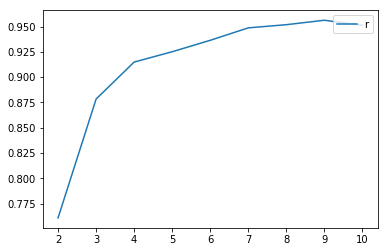

07:28:56 [lifestyle_utils:110][optimal_cluster][INFO]    Elbow method to get optimal clusters


<Figure size 432x288 with 0 Axes>

In [11]:
# centres,statistics = lsu_object.optimal_cluster(dataframe=df_ps,
#                                                 features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
#                                                 observation='res',
#                                                 start=2,
#                                                 end=10,
#                                                 show='Y')

centres,statistics = lsu_object.optimal_cluster(dataframe=df_ps,
                                                features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                                                observation='res',
                                                start=2,
                                                end=10,
                                                show='Y',
                                                file_name='ls_test.png')

#features=df_ps.columns[:-1]
#observation=df_ps.columns[-1]

In [12]:
centres

{2: [array([6.35074627, 0.56965025, 2.86119403, 0.3589801 , 4.99253731,
         0.67669975, 1.6761194 , 0.65671343]),
  array([5.02727273, 0.20232323, 3.40606061, 0.58585556, 1.53333333,
         0.09069851, 0.27272727, 0.07287879])],
 3: [array([5.03125   , 0.2034375 , 3.4375    , 0.59895521, 1.478125  ,
         0.08135064, 0.25      , 0.0634375 ]),
  array([5.95238095, 0.45899471, 2.72857143, 0.30380952, 4.42619048,
         0.58071025, 1.4452381 , 0.56051587]),
  array([6.93846154, 0.73290214, 3.05769231, 0.44070513, 5.84230769,
         0.82072627, 2.02307692, 0.80127436])],
 4: [array([6.3       , 0.55555556, 2.86470588, 0.36029412, 4.90882353,
         0.66251246, 1.68529412, 0.66053922]),
  array([5.03125   , 0.2034375 , 3.4375    , 0.59895521, 1.478125  ,
         0.08135064, 0.25      , 0.0634375 ]),
  array([5.54705882, 0.34640523, 2.58235294, 0.24323529, 3.93529412,
         0.49750748, 1.21764706, 0.46568627]),
  array([7.17058824, 0.79737974, 3.10588235, 0.46078431, 6.11

In [13]:
statistics

{2: 0.7607853570935202,
 3: 0.8783025129358772,
 4: 0.9149056615777825,
 5: 0.9251073099510887,
 6: 0.9364176566886907,
 7: 0.948722381044924,
 8: 0.9518579815346031,
 9: 0.9562611449523923,
 10: 0.9512583196233058}

In [14]:
##optimal_cluster method execution completed

get_cluster testing without predefined centers

In [15]:
centres,cluster_df = lsu_object.get_cluster(dataframe=df_ps,
                                            features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                                            observation='res',
                                            k=3,
                                            centres=None)

Creating 3 clusters


07:31:00 [lifestyle_utils:147][get_cluster][INFO]    Assign a cluster to each observation


In [16]:
centres

[array([5.99090909, 0.46969697, 2.74318182, 0.30988636, 4.45      ,
        0.58474576, 1.45227273, 0.56344697]),
 array([5.03125   , 0.2034375 , 3.4375    , 0.59895521, 1.478125  ,
        0.08135064, 0.25      , 0.0634375 ]),
 array([6.95      , 0.73610694, 3.05833333, 0.44097222, 5.91666667,
        0.83332917, 2.05833333, 0.81596389])]

In [17]:
cluster_df.show(5,False)

+------+-------+
|res   |cluster|
+------+-------+
|setosa|1      |
|setosa|1      |
|setosa|1      |
|setosa|1      |
|setosa|1      |
+------+-------+
only showing top 5 rows



In [18]:
####get_cluster method execution completed

get_cluster testing with predefined centers

In [19]:
import numpy as np

In [20]:
cent = [np.array([ 5.03125   ,  0.2034375 ,  3.4375    ,  0.59895521,  1.478125  ,
          0.08135064,  0.25      ,  0.0634375 ]),
  np.array([ 6.95      ,  0.73610694,  3.05833333,  0.44097222,  5.91666667,
          0.83332917,  2.05833333,  0.81596389]),
  np.array([ 5.99090909,  0.46969697,  2.74318182,  0.30988636,  4.45      ,
          0.58474576,  1.45227273,  0.56344697])]

In [21]:
centres,cluster_df = lsu_object.get_cluster(dataframe=df_ps,
                                            features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                                            observation='res',
                                            k=3,
                                            centres=cent)

08:32:28 [lifestyle_utils:147][get_cluster][INFO]    Assign a cluster to each observation


In [22]:
centres

[array([5.03125   , 0.2034375 , 3.4375    , 0.59895521, 1.478125  ,
        0.08135064, 0.25      , 0.0634375 ]),
 array([6.95      , 0.73610694, 3.05833333, 0.44097222, 5.91666667,
        0.83332917, 2.05833333, 0.81596389]),
 array([5.99090909, 0.46969697, 2.74318182, 0.30988636, 4.45      ,
        0.58474576, 1.45227273, 0.56344697])]

In [23]:
cluster_df.show(5,False)

+------+-------+
|res   |cluster|
+------+-------+
|setosa|0      |
|setosa|0      |
|setosa|0      |
|setosa|0      |
|setosa|0      |
+------+-------+
only showing top 5 rows



In [ ]:
# #create numpy array from dataframe

# centers_df

# +----------+----------+----------+----------+----------+----------+----------+----------+
# |a         |b         |c         |d         |e         |f         |g         |h         |
# +----------+----------+----------+----------+----------+----------+----------+----------+
# |5.03125   |0.2034375 |3.4375    |0.59895521|1.478125  |0.08135064|0.25      |0.0634375 |
# |6.95      |0.73610694|3.05833333|0.44097222|5.91666667|0.83332917|2.05833333|0.81596389|
# |5.99090909|0.46969697|2.74318182|0.30988636|4.45      |0.58474576|1.45227273|0.56344697|
# +----------+----------+----------+----------+----------+----------+----------+----------+

# import numpy as np
# c_new = np.array(centers_df.select('a', 'b', 'c','d', 'e', 'f','g', 'h').collect())

# array([[ 5.03125   ,  0.2034375 ,  3.4375    ,  0.59895521,  1.478125  ,
#          0.08135064,  0.25      ,  0.0634375 ],
#        [ 6.95      ,  0.73610694,  3.05833333,  0.44097222,  5.91666667,
#          0.83332917,  2.05833333,  0.81596389],
#        [ 5.99090909,  0.46969697,  2.74318182,  0.30988636,  4.45      ,
#          0.58474576,  1.45227273,  0.56344697]])

# final_df = kmeansmodel.get_cluster(k=3,
#                                    centres=c_new,
#                                    max_iteration=100,
#                                    seed=None)

In [24]:
####get_cluster method execution completed

dim_reduction_pca method

In [25]:
variance,pca_df = lsu_object.dim_reduction_pca(dataframe=df_ps,
                                              features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                                              k=5)

08:34:19 [lifestyle_utils:185][dim_reduction_pca][INFO]    Principal component analysis for dimensions reduction


In [26]:
variance

[0.9186894202647183,
 0.05934789521319101,
 0.018306572640711668,
 0.003655120764797586,
 5.367588024330234e-07]

In [27]:
pca_df.show(5,False)

+-------------------+------------------+-------------------+--------------------+-------------------+
|pc_1               |pc_2              |pc_3               |pc_4                |pc_5               |
+-------------------+------------------+-------------------+--------------------+-------------------+
|-2.796887562557044 |-5.542987160534471|0.4556894262344484 |0.11137021065022061 |0.4590199835905519 |
|-2.768345262575425 |-5.012615456447451|0.6649150918343851 |0.21435010314442696 |0.4592054484200197 |
|-2.5852387325206614|-5.050392172000156|0.42801440445758177|0.11821949292437468 |0.4592056740031088 |
|-2.7282323899519487|-4.870443928039159|0.4260051328596479 |0.014180057741036266|0.45930449911761523|
|-2.74832461996988  |-5.553631667752375|0.3347498823821098 |0.03781974691316485 |0.45903043533184545|
+-------------------+------------------+-------------------+--------------------+-------------------+
only showing top 5 rows



In [28]:
##dim_reduction_pca method execution completed

feature_standard method execution

In [29]:
df_ps.show(5,False)

+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
|a  |b          |c  |d                  |e  |f          |g  |h                   |res   |
+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
|5.1|0.222222222|3.5|0.625              |1.4|0.06779661 |0.2|0.041666667000000004|setosa|
|4.9|0.166666667|3.0|0.41666666700000005|1.4|0.06779661 |0.2|0.041666667000000004|setosa|
|4.7|0.111111111|3.2|0.5                |1.3|0.050847458|0.2|0.041666667000000004|setosa|
|4.6|0.083333333|3.1|0.45833333299999995|1.5|0.084745763|0.2|0.041666667000000004|setosa|
|5.0|0.194444444|3.6|0.666666667        |1.4|0.06779661 |0.2|0.041666667000000004|setosa|
+---+-----------+---+-------------------+---+-----------+---+--------------------+------+
only showing top 5 rows



In [30]:
mean,std,scaled_df = lsu_object.feature_standard(dataframe=df_ps,
                                                 features=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                                                 std_flag=True,
                                                 mean_flag=True)

08:35:52 [lifestyle_utils:223][feature_standard][INFO]    Normalizing each feature to have unit standard deviation and/or zero mean


In [31]:
mean

[5.914,
 0.44843233332999993,
 3.0409999999999995,
 0.43384899998999993,
 3.851,
 0.48331933899,
 1.213,
 0.4640480000199999]

In [32]:
std

[0.8564691436002786,
 0.2377174274551388,
 0.439488913455738,
 0.1828805727798637,
 1.7853780404930337,
 0.3024450331858343,
 0.7455802431595805,
 0.31020698975736466]

In [33]:
scaled_df.show(5,False)

+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+
|a                  |b                  |c                   |d                   |e                  |f                  |g                  |h                 |
+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+
|-0.950413691003795 |-0.9515924589613419|1.0443949459176234  |1.0452231043703675  |-1.3728184980493847|-1.3738785015348103|-1.3586733410573788|-1.361611269141211|
|-1.183930568400304 |-1.1852966328401555|-0.09329018035429623|-0.09395384500836255|-1.3728184980493847|-1.3738785015348103|-1.3586733410573788|-1.361611269141211|
|-1.417447445796814 |-1.4190008109256442|0.36178387015447205 |0.36171693364951946 |-1.4288290446854264|-1.429918939102802 |-1.3586733410573788|-1.361611269141211|
|-1.5342058844950694|-

In [34]:
##feature_standard method execution completed

In [35]:
##Ended